In [1]:
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import numpy as np

Read the raw data and print few rows

In [22]:
df=pd.read_csv('/content/Indian Earthquakes List Update_Magnitudes (1).csv',skiprows=9,encoding = "ISO-8859-1")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,7,9,10,11,12,13,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
0,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
1,1.0,-2474.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC


Warning received -  Columns (2,6,7,9,10,11,12,13,15,16,17) have mixed types

Print the number of rows

In [23]:
df.shape

(52990, 20)

Print the columns of the raw data

In [24]:
df.columns

Index(['Sl. No.', 'YEAR ', 'MONTH ', 'DATE', 'ORIGIN TIME', 'Unnamed: 5',
       'MAGNITUDE', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'LAT (N)', 'LONG (E)', 'DEPTH (km)', 'INTENSITY',
       'Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'REFERENCE'],
      dtype='object')

Pick required columns only. Apply filter based on columns required to create a new data

In [25]:
df_filter=df[['YEAR ', 'MONTH ', 'DATE', 'ORIGIN TIME', 'MAGNITUDE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']]
#df_filter = df_filter.iloc[1:] #Skip the first row with Column Description
df_filter.drop(0)
df_filter=df_filter[df_filter['YEAR ']>1000] #Filter for year grater than 1000
df_filter.head()

,YEAR,MONTH,DATE,ORIGIN TIME,MAGNITUDE,LAT (N),LONG (E),DEPTH (km)
15,1053.0,00,0.0,NaN,7.0,69.13,32.85,0.0
16,1063.0,12,5.0,NaN,NaN,19.1,73.2,NaN
17,1100.0,00,0.0,NaN,8.5,85,27.5,0.0
18,1102.0,02,28.0,NaN,5.6,62.2,34.4,0.0
19,1294.0,00,0.0,NaN,7.5,77.2,30.5,0.0


In [26]:
df_filter.shape

(52975, 8)

Rename the columns to avoid spaces

In [27]:
req_columns=['YEAR', 'MONTH', 'DAY', 'ORIGIN_TIME', 'MAGNITUDE','LAT', 'LONG', 'DEPTH_KM']

In [28]:
df_filter.columns=req_columns
df_filter.columns

Index(['YEAR', 'MONTH', 'DAY', 'ORIGIN_TIME', 'MAGNITUDE', 'LAT', 'LONG',
       'DEPTH_KM'],
      dtype='object')

In [29]:
df_filter.shape

(52975, 8)

In [30]:
df_filter.to_csv('earthquakes1.csv', encoding='utf-8', index=False)

In [31]:
missing_values_count = df_filter.isnull().sum()
missing_values_count

YEAR               0
MONTH             18
DAY               57
ORIGIN_TIME    31791
MAGNITUDE      12054
LAT                0
LONG               0
DEPTH_KM        2177
dtype: int64

Based on number of Nulls in ORIGIN_TIME , more than 50% of samples have nulls. Therfore dropping this column as it cannot contribute to the data analysis

In [32]:
df_filter.drop('ORIGIN_TIME', 1,inplace=True)

In [33]:
df_filter.shape
df_filter.dropna(subset=['DAY','MONTH'], how='all',inplace=True)
df_filter = df_filter[df_filter['DAY'].notna() ]
df_filter = df_filter[df_filter['MONTH'].notna() ]
df_filter = df_filter[(df_filter[['DAY','MONTH']] != 0).all(axis=1)]

df_filter=df_filter[~df_filter['MONTH'].isnull()]
df_filter=df_filter[~df_filter['DAY'].isnull()]

In [34]:
df_filter.DAY.isnull().sum(),df_filter.DAY.isna().sum()

(0, 0)

In [ ]:
df_filter.shape

(52889, 7)

Replace Depth with mode where ever missing

In [35]:
df_filter['DEPTH_KM'].fillna(df_filter['DEPTH_KM'].mode()[0], inplace=True)

In [36]:
missing_values_count = df_filter.isnull().sum()
missing_values_count

YEAR             0
MONTH            0
DAY              0
MAGNITUDE    12008
LAT              0
LONG             0
DEPTH_KM         0
dtype: int64

Replace missing Magnitude with Average

In [37]:
df_filter['MAGNITUDE']=df_filter['MAGNITUDE'].astype(float)
df_filter['MAGNITUDE'].fillna(df_filter['MAGNITUDE'].mean(), inplace=True)

Drop the inconsistent lat/long notations. Making an assumption that all lat longs are in N/E Hemisphere based on Geographic region under study

In [38]:
searchfor = ['°', 'E','W','N','S']
df_filter=  df_filter[~df_filter.LAT.str.contains('|'.join(searchfor),na=False)]
df_filter=  df_filter[~df_filter.LONG.str.contains('|'.join(searchfor),na=False)]

COnvert LAT/LONG from string to float 

In [39]:
df_filter['LAT']=df_filter['LAT'].astype(float)
df_filter['LONG']=df_filter['LONG'].astype(float)

Check if LAT/LONG are in ideal range (-90,90) and (-180,180) respectively

In [40]:
df_filter['LAT'].min(),df_filter['LAT'].max()

(-10.9, 100.0)

LAT column has some invalid data. Drop those rows

In [41]:
df_filter=df_filter[df_filter['LAT']>0 ] 
df_filter=df_filter[df_filter['LAT']<90] 

In [42]:
df_filter['LONG'].min(),df_filter['LONG'].max()

(0.8, 179.9)

In [57]:
df_filter=df_filter[~df_filter['MONTH'].isnull()]
df_filter = df_filter[df_filter['MONTH'].notna() ]

df_filter=df_filter.dropna(subset=['MONTH'])

df_filter = df_filter[pd.notnull(df_filter['MONTH'])]

df_filter[ pd.to_numeric(df_filter['MONTH'], errors='coerce').isnull()]

,YEAR,MONTH,DAY,MAGNITUDE,LAT,LONG,DEPTH_KM
3110,1964,,7,5.05853,27.5,93.0,0.0
3111,1964,,7,5.05853,30.1,98.9,33.0


In [55]:
df_filter['MONTH'].replace(to_replace="[a-zA-Z]", value='',regex=True, inplace=True)

In [ ]:
df_filter[df_filter['MONTH'] == ''].index
text_empty =df_filter['MONTH'].str.len() > -1
df_filter.loc[text_empty].index

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
df_filter = pd.DataFrame(my_imputer.fit_transform(df_filter))

In [49]:
df_filter['YEAR']=df_filter['YEAR'].astype(int)

In [50]:
df_filter['DAY']=df_filter['DAY'].astype(int)

In [ ]:
df_filter=df_filter[~df_filter['MONTH'].isnull()]
df_filter['MONTH']=df_filter['MONTH'].astype(int)

In [ ]:
df_filter['DT']=pd.to_datetime(df_filter[['YEAR', 'MONTH', 'DAY']])

In [ ]:
df_filter.to_csv('earthquakes2.csv', encoding="utf-8", index=False)
df_filter.shape

In [ ]:
missing_values_count = df_filter.isnull().sum()
missing_values_count

Notice that after cleaning the dataset, there are no null values . We can now use this data in the ML algorithms

In [ ]:
#No of rows removed,#No of columns removed
df.shape[0]-df_filter.shape[0],df.shape[1]-df_filter.shape[1]

Percentage of rows dropped after data cleaning

In [ ]:
#% of rows removed
((df.shape[0]-df_filter.shape[0])/df.shape[0])*100.0

**Classifier using KNN**

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [36]:
#Load the dataset


#dtypes = {'MAGNITUDE': 'float', 'LAT': 'float', 'LONG': 'float', 'DEPTH_KM': 'float','DT': 'str','IsEarthQuake': 'int'}
#parse_dates = ['DT']

df = pd.read_csv('earthquakes_final.csv')

#Print the first 5 rows of the dataframe.
df.head()

,YEAR,MONTH,DAY,MAGNITUDE,LAT,LONG,DEPTH_KM,IsEarthQuake
0,1779,1,7,5.200000,74.50,34.6,0.0,1
1,1780,8,17,5.200000,77.00,35.0,0.0,1
2,1784,11,1,5.800000,74.50,34.6,0.0,1
3,1787,6,1,7.800000,89.75,24.5,0.0,1
4,1792,5,29,4.536804,13.10,80.1,0.0,0


In [29]:
df.dtypes

YEAR              int64
MONTH             int64
DAY               int64
MAGNITUDE       float64
LAT             float64
LONG            float64
DEPTH_KM        float64
IsEarthQuake      int64
dtype: object

In [39]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['MONTH'], prefix='MONTH')],axis=1)
# now drop the original 'MONTH' column (you don't need it anymore)
df.drop(['MONTH'],axis=1, inplace=True)


In [38]:
df = pd.concat([df,pd.get_dummies(df['DAY'], prefix='day')],axis=1)

In [40]:
df.drop(['DAY'],axis=1, inplace=True)

In [24]:
#Let's observe the shape of the dataframe.
df.shape

(36900, 19)

In [41]:
df.columns

Index(['YEAR', 'MAGNITUDE', 'LAT', 'LONG', 'DEPTH_KM', 'IsEarthQuake', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'day_31', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5',
       'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11',
       'MONTH_12'],
      dtype='object')

In [42]:
#Let's create numpy arrays for features and target
X = df.drop('IsEarthQuake',axis=1).values
y = df['IsEarthQuake'].values

In [43]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [45]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

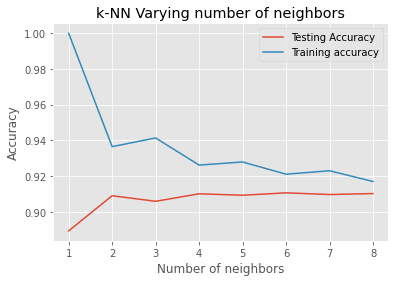

In [46]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
#We can observe above that we get maximum testing accuracy for k=6. So lets create a KNeighborsClassifier with number of neighbors as 6.

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9105691056910569

Confusion Matrix

In [48]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[12927,   149],
       [ 1171,   513]])

In [49]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,12927,149,13076
1,1171,513,1684
All,14098,662,14760


Classification Report

In [50]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13076
           1       0.77      0.30      0.44      1684

    accuracy                           0.91     14760
   macro avg       0.85      0.65      0.69     14760
weighted avg       0.90      0.91      0.89     14760



ROC (Reciever Operating Charecteristic) curve

In [51]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

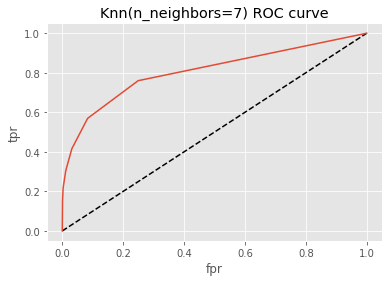

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [53]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.806457988343679

Cross Validation & Hyperparameter tuning

In [54]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
knn_cv.best_score_

0.7699728997289973

In [56]:
knn_cv.best_params_

{'n_neighbors': 48}

**Decision Tree Classifier**

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
#Setup arrays to store training and test accuracies
pre_prune_depth_list= np.arange(start=3, stop=50, step=2)
train_accuracy =np.empty(len(pre_prune_depth_list))
test_accuracy = np.empty(len(pre_prune_depth_list))

for i,ppd in enumerate(pre_prune_depth_list):
    #Setup a DecisionTreeClassifier classifier with max_depth
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=ppd, random_state=0)

    
    #Fit the model
    clf.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = clf.score(X_test, y_test) 

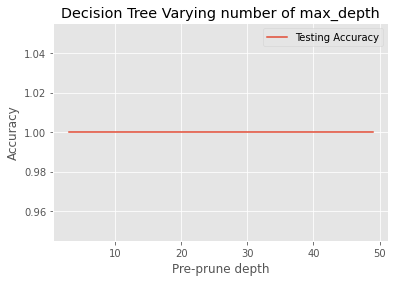

In [65]:
#Generate plot
plt.title('Decision Tree Varying number of max_depth')
plt.plot(pre_prune_depth_list, test_accuracy, label='Testing Accuracy')
plt.plot(pre_prune_depth_list, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Pre-prune depth')
plt.ylabel('Accuracy')
plt.show()

In [66]:
#We can observe above that we get maximum testing accuracy irrespective of max_depth
#Setup a DecisionTreeClassifier classifier with max_depth=3
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
#Fit the model
clf.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
clf.score(X_test,y_test)

1.0

Confusion Matrix

In [67]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[13076,     0],
       [    0,  1684]])

In [68]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,13076,0,13076
1,0,1684,1684
All,13076,1684,14760


Classification Report

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13076
           1       1.00      1.00      1.00      1684

    accuracy                           1.00     14760
   macro avg       1.00      1.00      1.00     14760
weighted avg       1.00      1.00      1.00     14760



ROC (Reciever Operating Charecteristic) curve

In [70]:
y_pred_proba = clf.predict_proba(X_test)[:,1]

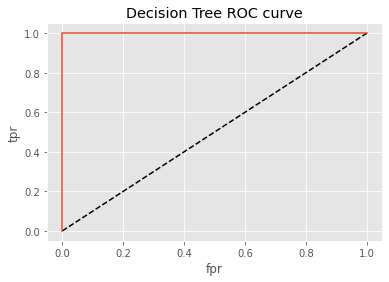

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision Tree ROC curve')
plt.show()

In [72]:
roc_auc_score(y_test,y_pred_proba)

1.0

Cross Validation & Hyperparameter tuning


In [76]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'max_depth':np.arange(1,50)}

clf=DecisionTreeClassifier()
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [77]:
clf_cv.best_score_

1.0

In [78]:
clf_cv.best_params_

{'max_depth': 1}